<a href="https://colab.research.google.com/github/mobarakol/AI_Medical_Imaging/blob/main/Interpretable_Models_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpretable Models

Installation

In [33]:
!pip install -q interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00


Download the dataset

In [1]:
!git clone https://github.com/mobarakol/AI_Medical_Imaging.git
%cd AI_Medical_Imaging

Cloning into 'AI_Medical_Imaging'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 54 (delta 18), reused 14 (delta 1), pack-reused 0
Receiving objects: 100% (54/54), 1.03 MiB | 7.10 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/AI_Medical_Imaging


#Diabetes Database
Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database<br>

**Attribute Information**<br>
Pregnancies	<br>
Glucose	<br>
BloodPressure<br>
SkinThickness<br>
Insulin	<br>
BMI	<br>
DiabetesPedigreeFunction<br>
Age	<br>
Outcome: [0 1]

In [18]:
%cd /content/AI_Medical_Imaging
import pandas as pd
path = '/content/AI_Medical_Imaging/data/diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv(path, header=None, names=col_names)
data.drop(index=data.index[0], axis=0, inplace=True)
print('Sample Size:', len(data))
data.head(5)

/content/AI_Medical_Imaging
Sample Size: 768


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


#Dataloader

In [29]:
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
X = data[feature_cols] # Features
y = data.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#Logistic Regression
Using sklearn:

/content/AI_Medical_Imaging
TrainSet Sample size: 537 TestSet Sample Size: 231
Accuracy: 0.7835497835497836


<Axes: ylabel='Feature'>

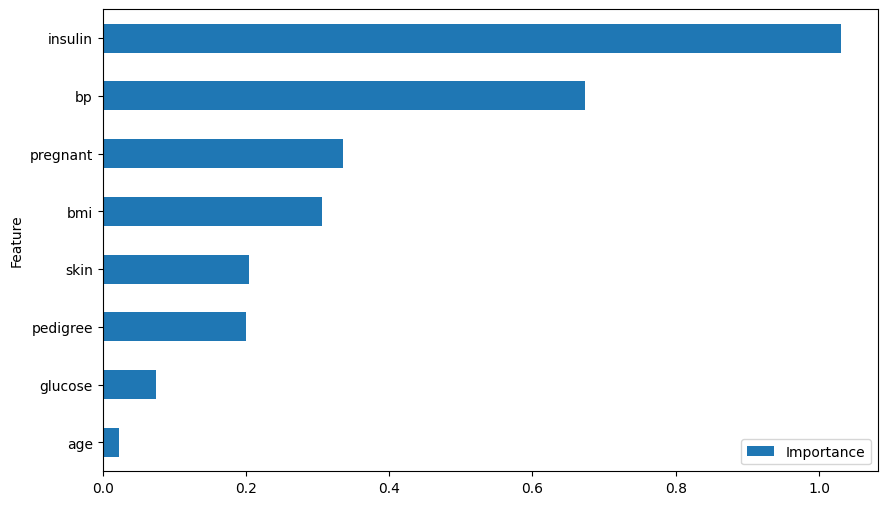

In [47]:
%cd /content/AI_Medical_Imaging

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics

print("TrainSet Sample size:", len(X_train), 'TestSet Sample Size:', len(X_test))
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': list(data.columns)[:-1], 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Using interpret:

In [36]:
%cd /content/AI_Medical_Imaging
# %% Imports
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree,
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score


print("TrainSet Sample size:", len(X_train), 'TestSet Sample Size:', len(X_test))

# %% Fit logistic regression model
lr = LogisticRegression(random_state=2021, feature_names=list(data.columns)[:-1], penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("Training finished.")

# %% Evaluate logistic regression model
y_pred = lr.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

# %% Explain local prediction
lr_local = lr.explain_local(X_test[:100], y_test[:100], name='Logistic Regression (Individual)')
show(lr_local)

# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression (Overall)')
show(lr_global)

/content/AI_Medical_Imaging
TrainSet Sample size: 537 TestSet Sample Size: 231
Training finished.
F1 Score 0.7514632466861766
Accuracy 0.7835497835497836


#Decision Tree
Using sklearn:

/content/AI_Medical_Imaging
TrainSet Sample size: 537 TestSet Sample Size: 231
Accuracy: 0.7272727272727273


<Axes: ylabel='Feature'>

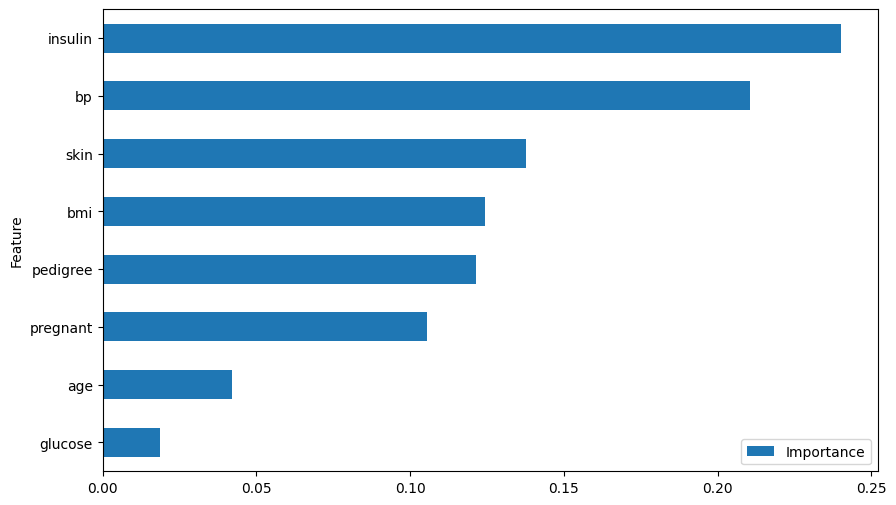

In [45]:
%cd /content/AI_Medical_Imaging

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics


print("TrainSet Sample size:", len(X_train), 'TestSet Sample Size:', len(X_test))

clf = DecisionTreeClassifier(criterion="entropy")

# Fit the decision tree classifier
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Print the feature importances
feature_importances = clf.feature_importances_

feature_importance = pd.DataFrame({'Feature': list(data.columns)[:-1], 'Importance': feature_importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Accuracy: 0.7705627705627706


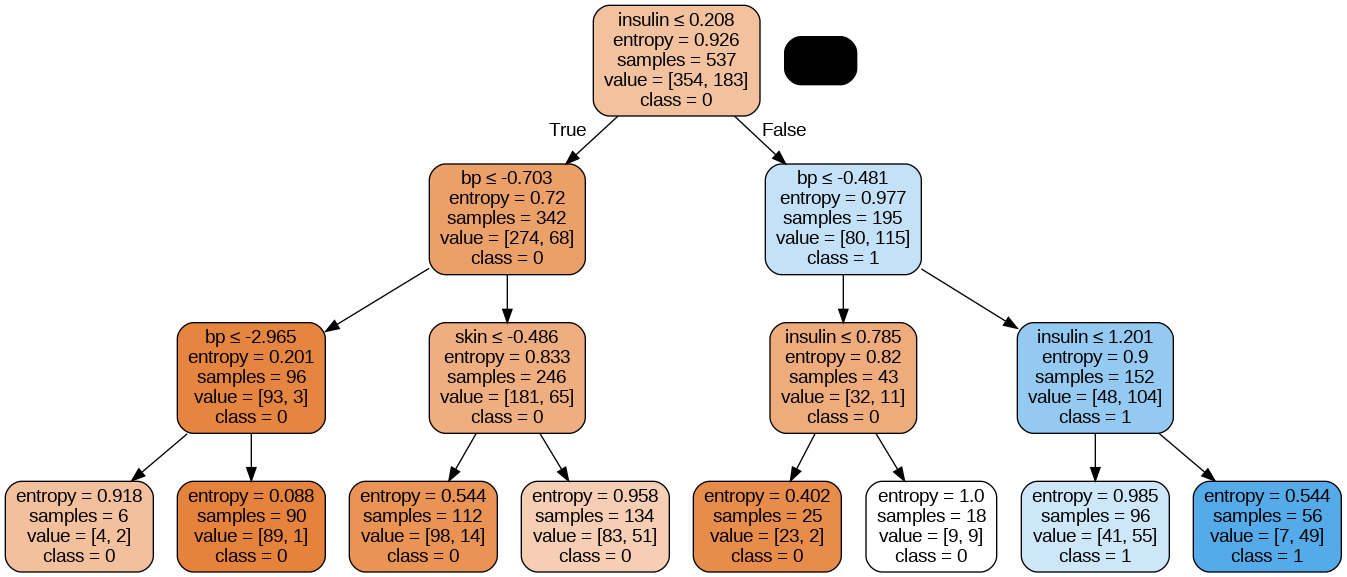

In [46]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = list(data.columns)[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Using interpret:

In [40]:
%cd /content/AI_Medical_Imaging
# %% Imports
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree,
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

tree = ClassificationTree()
tree.fit(X_train, y_train)
print("Training finished.")
y_pred = tree.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

# %% Explain local prediction
tree_local = tree.explain_local(X_test[:100], y_test[:100], name='Tree')
show(tree_local)

/content/AI_Medical_Imaging
Training finished.
F1 Score 0.7254668930390492
Accuracy 0.7575757575757576
